Desde la terminal:

```bash
pip install -r requirements.txt
````

**🤗 HUGGINGFACE TRANSFORMERS, DIFFUSERS Y PIPELINE**

HuggingFace ofrece la librería ***Transformers*** con la que se pueden utilizar grandes modelos de lenguaje pre-entrenados.

Para modelos de imagen también está la librería ***Diffusers***.

La herramienta [***pipeline***](https://huggingface.co/docs/transformers/main_classes/pipelines) permite utilizar las librerías de forma sencilla abstrayéndose de la mayor parte del código.

In [1]:
from transformers import pipeline

2024-10-05 19:04:35.079941: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-10-05 19:04:35.205685: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-10-05 19:04:35.259966: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-10-05 19:04:35.273745: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-10-05 19:04:35.394740: I tensorflow/core/platform/cpu_feature_guar

## Ejemplos

Como argumento a pipeline se le pasa la tarea a resolver.

Las tareas soportadas son:

- "audio-classification"
- "automatic-speech-recognition"
- "depth-estimation"
- "document-question-answering"
- "conversational"
- "feature-extraction"
- "fill-mask"
- "image-classification"
- "image-feature-extraction"
- "image-to-text"
- "image-to-image"
- "image-segmentation"
- "mask-generation"
- "object-detection"
- "question-answering"
- "table-question-answering"
- "text2text-generation"
- "text-classification" (alias "sentiment-analysis" available)
- "text-generation"
- "text-to-audio"
- "token-classification" (alias "ner" available)
- "translation"
- "translation_xx_to_yy"
- "summarization"
- "video-classification"
- "visual-question-answering"
- "zero-shot-classification"
- "zero-shot-image-classification"
- "zero-shot-audio-classification"
- "zero-shot-object-detection"


Lo más práctico es ir a [tareas](https://https://huggingface.co/tasks), elegir la que se desee y consultar cómo utilizar los modelos pertenecientes a la tarea seleccionada

**Ejemplo para clasificación de texto**

In [2]:
pipe = pipeline("text-classification")
pipe("I love this song so much!")

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

[{'label': 'POSITIVE', 'score': 0.9998823404312134}]

Cada tarea tiene asociado un modelo por defecto. Si se desea utilizar un [modelo determinado](https://huggingface.co/models?pipeline_tag=text-classification), se puede especificar en los argumentos.

In [3]:
pipe = pipeline("text-classification", model="roberta-large-mnli")
pipe("I love this song so much!")

config.json:   0%|          | 0.00/688 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.43G [00:00<?, ?B/s]

Some weights of the model checkpoint at roberta-large-mnli were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/transformers/tokenization_utils_base.py:1617: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be deprecated in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


[{'label': 'NEUTRAL', 'score': 0.6192828416824341}]

**Ejemplo para traducción**

Al elegir *traducción* (o cualquier otra tarea), dentro de la [carta](https://huggingface.co/tasks/translation) de los modelos se puede ver lo siguiente:

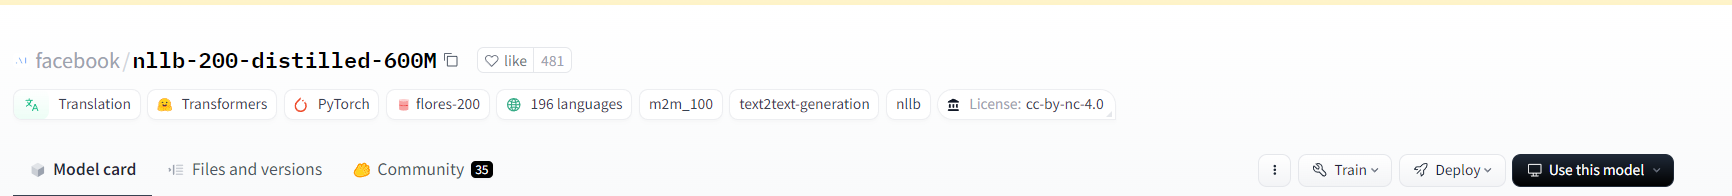

En el botón de *Use this models* y luego en *Use in Transformers* se puede copiar directamente el código para utilizar el modelo.

Si no funciona directamente puede ser útil entrar a *Read model documentation*.

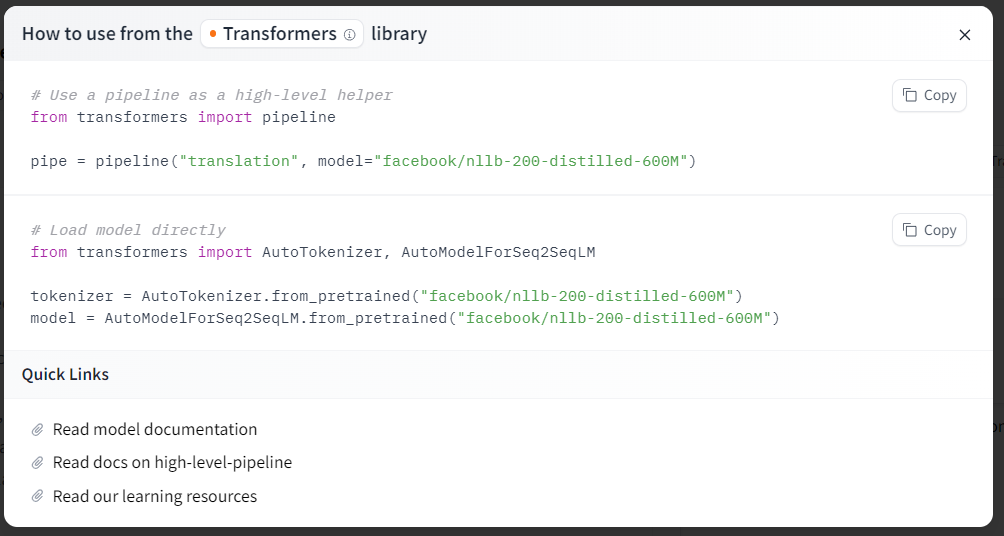

In [4]:
from transformers import AutoTokenizer, M2M100ForConditionalGeneration

model = M2M100ForConditionalGeneration.from_pretrained("facebook/m2m100_418M")
tokenizer = AutoTokenizer.from_pretrained("facebook/m2m100_418M")

text_to_translate = "Life is like a box of chocolates"
model_inputs = tokenizer(text_to_translate, return_tensors="pt")

# traducir a Español
gen_tokens = model.generate(**model_inputs, forced_bos_token_id=tokenizer.get_lang_id("es"))
print(tokenizer.batch_decode(gen_tokens, skip_special_tokens=True))

config.json:   0%|          | 0.00/908 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/1.94G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/233 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/298 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/3.71M [00:00<?, ?B/s]

sentencepiece.bpe.model:   0%|          | 0.00/2.42M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/1.14k [00:00<?, ?B/s]

['La vida es como una caja de chocolate']


In [5]:
article_text = """Videos that say approved vaccines are dangerous and cause autism, cancer or infertility are among those that will be taken down, the company said.  The policy includes the termination of accounts of anti-vaccine influencers.  Tech giants have been criticised for not doing more to counter false health information on their sites.  In July, US President Joe Biden said social media platforms were largely responsible for people's scepticism in getting vaccinated by spreading misinformation, and appealed for them to address the issue.  YouTube, which is owned by Google, said 130,000 videos were removed from its platform since last year, when it implemented a ban on content spreading misinformation about Covid vaccines.  In a blog post, the company said it had seen false claims about Covid jabs "spill over into misinformation about vaccines in general". The new policy covers long-approved vaccines, such as those against measles or hepatitis B.  "We're expanding our medical misinformation policies on YouTube with new guidelines on currently administered vaccines that are approved and confirmed to be safe and effective by local health authorities and the WHO," the post said, referring to the World Health Organization."""

model_inputs = tokenizer(article_text, return_tensors="pt")
gen_tokens = model.generate(**model_inputs, forced_bos_token_id=tokenizer.get_lang_id("es"))
print(tokenizer.batch_decode(gen_tokens, skip_special_tokens=True))

['Los videos que dicen que las vacunas aprobadas son peligrosas y causan autismo, cáncer o infertilidad son entre los que se eliminarán, la compañía dijo. La política incluye la eliminación de cuentas de influyentes contra la vacuna. Los gigantes tecnológicos han sido criticados por no hacer más para contrarrestar la información de salud falsa en sus sitios. En julio, el presidente de EE.UU. Joe Biden dijo que las plataformas de redes sociales eran en gran medida responsables del scepticismo de la gente en recibir la vacunación a través de la difusión de la información falsa, y les llamó a abordar el problema. YouTube, que es propiedad de Google, dijo que 130.000 videos fueron eliminados de su plataforma desde el año pasado, cuando se implementó una prohibición de contenidos de la difusión de la información falsa sobre las vacunas']


**Ejemplo para generación de imágenes**

In [5]:
from diffusers import StableDiffusionPipeline, EulerDiscreteScheduler
import torch

model_id = "stabilityai/stable-diffusion-2"

# Use the Euler scheduler here instead
scheduler = EulerDiscreteScheduler.from_pretrained(model_id, subfolder="scheduler")
pipe = StableDiffusionPipeline.from_pretrained(model_id, scheduler=scheduler, torch_dtype=torch.float16)
pipe = pipe.to("cuda")

prompt = "a photo of an astronaut riding a horse on mars"
image = pipe(prompt).images[0]

Fetching 12 files:   0%|          | 0/12 [00:00<?, ?it/s]

diffusion_pytorch_model.safetensors:  85%|########5 | 2.96G/3.46G [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


  0%|          | 0/50 [00:00<?, ?it/s]

[]

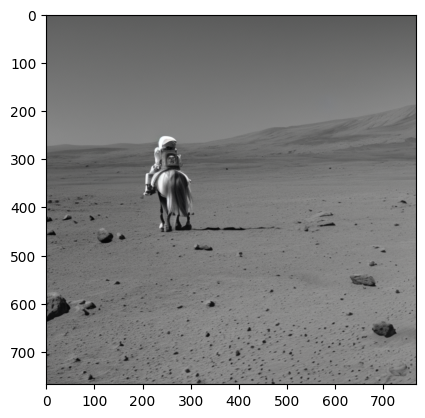

In [6]:
import matplotlib.pyplot as plt

plt.imshow(image)
plt.plot()

**Ejemplo con interfaz gráfica**

In [8]:
import gradio as gr

def classify(text):
  pipe = pipeline("text-classification")
  result = pipe(text)[0]
  return result['label'], result['score']

iface = gr.Interface(
	fn=classify,
	inputs=[gr.Textbox(label="Introduce texto")],
	title="Ejemplo de interfaz",
	outputs=[gr.Label(label="Label"), gr.Label(label="Score")],
  theme="dark-peach")
iface.launch()

/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/gradio/blocks.py:982: UserWarning: Cannot load dark-peach. Caught Exception: module 'huggingface_hub.utils' has no attribute '_errors'
  warnings.warn(f"Cannot load {theme}. Caught Exception: {str(e)}")


Running on local URL:  http://127.0.0.1:7860

To create a public link, set `share=True` in `launch()`.


## Tarea

1. Elegir una [tarea](https://huggingface.co/tasks) (diferente de “text classification”).

2. Elegir un [dataset](https://huggingface.co/datasets) asociado a dicha tarea.

    La mayoría de datasets del hub de HuggingFace se han utilizado para entrenar grandes modelos. Para evitar manejar datasets grandes, se puede seleccionar un subconjunto de ellos o utilizar un dataset customizado.

    Otras alternativas:
    - Kaggle NLP Datasets
    - Datasets for Natural Language Processing - MachineLearningMastery.com
    
3. Elegir un modelo para resolver la tarea elegida.

4. Evaluar el modelo sobre el dataset elegido.
    [Aquí](https://huggingface.co/evaluate-metric) se pueden comprobar las métricas asociadas a diferentes tareas.

    La evaluación en tareas generativas puede ser más compleja que en otras tareas. Por ejemplo, en clasificación la calidad del modelo se puede evaluar por el porcentaje de aciertos porque la etiqueta esperada es única, sin embargo, en un modelo de generación de texto puede haber varias respuestas válidas. Para esto hay métricas como la perplejidad o la BLEU score. Como alternativa a utilizar estas métricas, el alumno puede actuar como evaluador humano para discutir qué modelo es mejor.
5. Crear una demo sencilla con gradio/streamlit para desplegarlo

## Extra: Fine-tunear un modelo pre-entrenado (no se pide realizar nada en este apartado)

Usar modelos preentrenados tiene importantes ventajas. Principalmente reduce los costes de computación y permite utilizar modelos del estado del arte sin tener que entrenarlos desde cero.

Cuando un modelo preentrenado no es suficente para satisfacer la tarea para la que se quiere utilizar se recurre a re-entrenar el modelo con unos pocos datos del dominio para el cuál queremos utilizarlo, esto es el ***fine-tuning***.

### Datos

En este ejemplo vamos a descargar un dataset de reviews

In [9]:
from datasets import load_dataset

dataset = load_dataset("yelp_review_full")
dataset["train"][100]

README.md:   0%|          | 0.00/6.72k [00:00<?, ?B/s]

train-00000-of-00001.parquet:   0%|          | 0.00/299M [00:00<?, ?B/s]

test-00000-of-00001.parquet:   0%|          | 0.00/23.5M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/650000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/50000 [00:00<?, ? examples/s]

{'label': 0,
 'text': 'My expectations for McDonalds are t rarely high. But for one to still fail so spectacularly...that takes something special!\\nThe cashier took my friends\'s order, then promptly ignored me. I had to force myself in front of a cashier who opened his register to wait on the person BEHIND me. I waited over five minutes for a gigantic order that included precisely one kid\'s meal. After watching two people who ordered after me be handed their food, I asked where mine was. The manager started yelling at the cashiers for \\"serving off their orders\\" when they didn\'t have their food. But neither cashier was anywhere near those controls, and the manager was the one serving food to customers and clearing the boards.\\nThe manager was rude when giving me my order. She didn\'t make sure that I had everything ON MY RECEIPT, and never even had the decency to apologize that I felt I was getting poor service.\\nI\'ve eaten at various McDonalds restaurants for over 30 years. 

En este caso se necesita un tokenizador para procesar el texto e incluir una estrategia de padding y truncado para manejar cualquier longitud de secuencia variable. Para procesar el conjunto de datos en un solo paso, se utiliza el método de map para aplicar una función a todo el conjunto de datos.

In [10]:
from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained("google-bert/bert-base-cased")


def tokenize_function(examples):
    return tokenizer(examples["text"], padding="max_length", truncation=True)


tokenized_datasets = dataset.map(tokenize_function, batched=True)

tokenizer_config.json:   0%|          | 0.00/49.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/213k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/436k [00:00<?, ?B/s]

/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


Map:   0%|          | 0/650000 [00:00<?, ? examples/s]

Map:   0%|          | 0/50000 [00:00<?, ? examples/s]

Si hay demasiados datos se puede crear un subconjunto más pequeño para reducir el tiempo de entrenamiento.

In [11]:
small_train_dataset = tokenized_datasets["train"].shuffle(seed=42).select(range(1000))
small_eval_dataset = tokenized_datasets["test"].shuffle(seed=42).select(range(1000))

La librería Transformers proporciona una clase Trainer optimizada para el entrenamiento de modelos Transformers, facilitando el inicio del entrenamiento sin necesidad de escribir manualmente el bucle de entrenamiento.

In [12]:
from transformers import AutoModelForSequenceClassification

model = AutoModelForSequenceClassification.from_pretrained("google-bert/bert-base-cased", num_labels=5)

model.safetensors:   0%|          | 0.00/436M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at google-bert/bert-base-cased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Aquí creamos una clase TrainingArguments que contendrá todos los hiperparámetros a ajustar. En este caso se dejan los hiperparámetros de entrenamiento por defecto.

En output_dir se especifica dónde guardar los checkpoints durante el entrenamiento.

In [13]:
from transformers import TrainingArguments

training_args = TrainingArguments(output_dir="test_trainer")

Trainer no evalúa automáticamente el rendimiento del modelo durante el entrenamiento. A Trainer se le pasa una función de Evaluate para calcular e informar de las métricas.

In [16]:
import numpy as np
import evaluate

metric = evaluate.load("accuracy")

In [17]:
def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = np.argmax(logits, axis=-1)
    return metric.compute(predictions=predictions, references=labels)

Finalmente se crea el objeto trainer

In [19]:
from transformers import Trainer

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=small_train_dataset,
    eval_dataset=small_eval_dataset,
    compute_metrics=compute_metrics,
)

In [20]:
trainer.train()

Step,Training Loss


TrainOutput(global_step=375, training_loss=1.1680975748697917, metrics={'train_runtime': 255.4936, 'train_samples_per_second': 11.742, 'train_steps_per_second': 1.468, 'total_flos': 789354427392000.0, 'train_loss': 1.1680975748697917, 'epoch': 3.0})